# Monitor agent's training

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")


import cycler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from pathlib import Path

from zxreinforce.plot_utils import plot_action_hist

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
color_palette_ibm = ['#648fff', '#ffb000', '#dc267f', '#785ef0', '#fe6100']
cycler_color_palette_ibm = cycler.cycler(color=color_palette_ibm)

def nice_plot(to_plot, step_dict, value_dict, ylims=(None, None), ylabel="", 
              savename=None, color_cycler=cycler_color_palette_ibm,
              figsize=(10,2)):
    '''to_plot: list of keys
    step_dict: dict of xvalues for each key
    value_dict: dict of yvalues for each key'''
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_prop_cycle(color_cycler)
    for val in to_plot:
        ax.plot(step_dict[val], value_dict[val], label=val, marker="x")
    ax.tick_params(direction="in", right=True, top=True)
    ax.set_xlabel("step")
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylims)
    ax.legend()
    ax.grid()
    if savename:
        plt.savefig(savename)
    plt.show()

def nice_plot_x_y(x_list, y_list, label_list=None, ylims=(None, None), ylabel="", xlabel="",
              savename=None, color_cycler=cycler_color_palette_ibm,
              figsize=(10,2), yscale=None):
    '''x_list: list of xvalues
    y_list: list of yvalues'''
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_prop_cycle(color_cycler)
    if label_list:
        for x, y, label in zip(x_list, y_list, label_list):
            ax.plot(x, y, label=label, marker="x")
    else:
        for x, y in zip(x_list, y_list):
            ax.plot(x, y, marker="x")
    ax.tick_params(direction="in", right=True, top=True)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.legend()
    ax.grid()
    if yscale:
        ax.set_yscale(yscale)
    if savename:
        plt.savefig(savename)

    ax.set_ylim(ylims)
    plt.show()

In [4]:
import_path = Path("../../saved_agents/normal_seed=1_20240412-204341/logs")
event_acc = EventAccumulator(str(import_path), size_guidance={"tensors" : 10000})

event_acc.Reload()

In [5]:
tracked_values_list = event_acc.Tags()["tensors"]
value_dict = {}
step_dict = {}

for tracked_value in tracked_values_list:
    step_val = np.array([[event.step, tf.make_ndarray(event.tensor_proto)]
                         for event in event_acc.Tensors(tracked_value)])
    step_dict[tracked_value] = step_val[:, 0]
    value_dict[tracked_value] = step_val[:, 1]

In [6]:
print(f'Total wall_time: {event_acc.Tensors("kl")[-1].wall_time - event_acc.Tensors("kl")[0].wall_time}s')
print(f'Time per episode: {(event_acc.Tensors("kl")[-1].wall_time - event_acc.Tensors("kl")[0].wall_time) / (len(event_acc.Tensors("kl")) -1)}s')
print(f'Time per global_step: {(event_acc.Tensors("kl")[-1].wall_time - event_acc.Tensors("kl")[0].wall_time) / (event_acc.Tensors("kl")[-1].step - event_acc.Tensors("kl")[0].step)}s')


Total wall_time: 136467.69826698303s
Time per episode: 342.0243064335414s
Time per global_step: 0.003800270071483794s


In [7]:
plot_path = import_path.parent / 'plots'
plot_path.mkdir(parents=True, exist_ok=True)

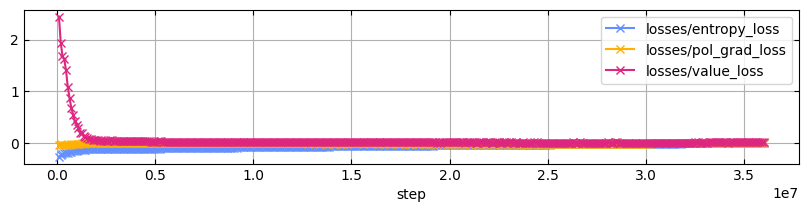

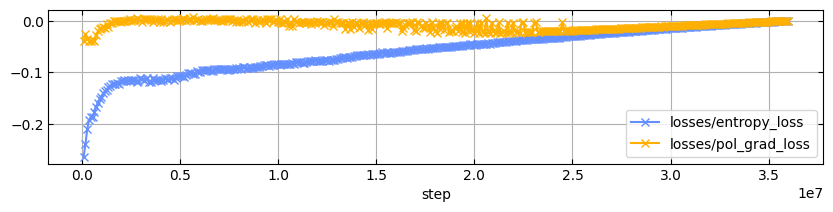

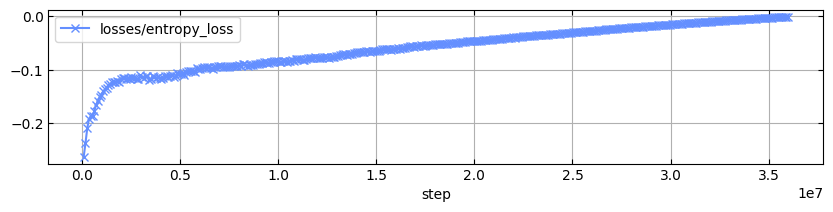

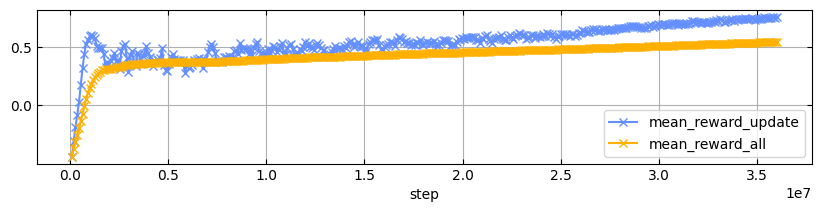

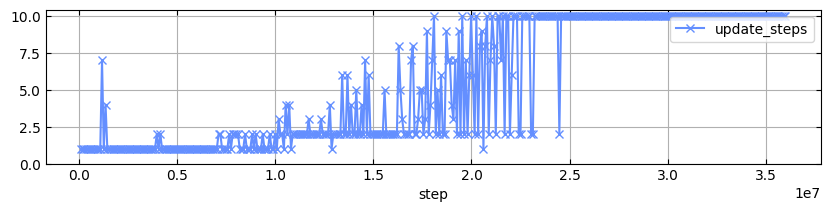

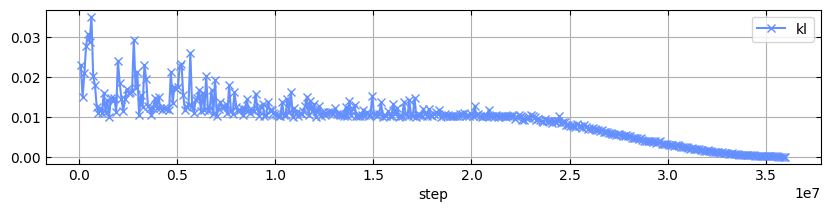

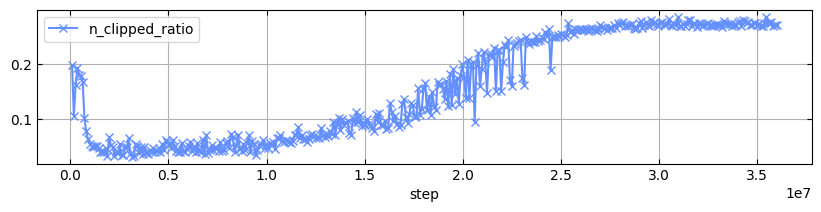

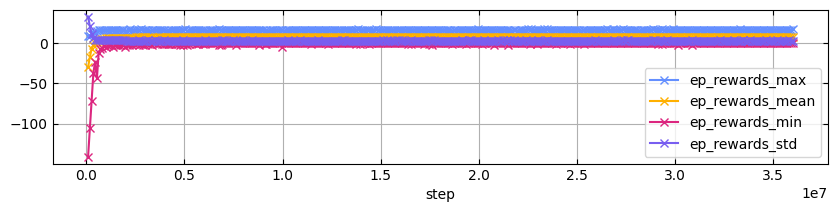

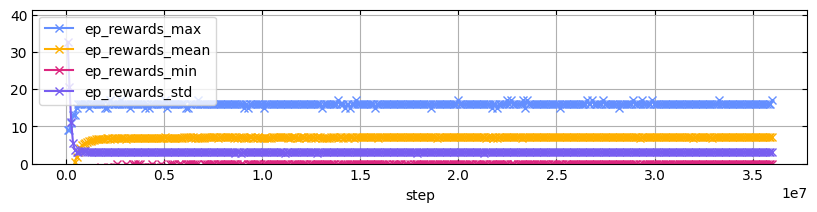

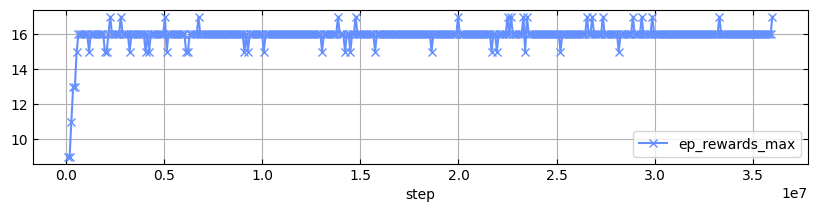

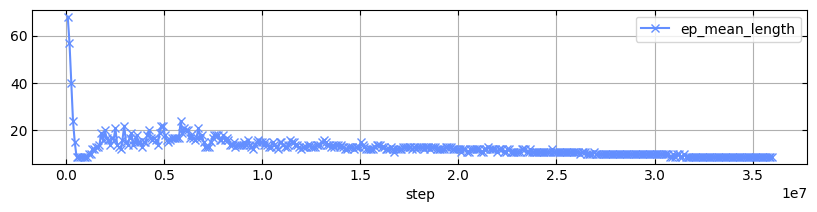

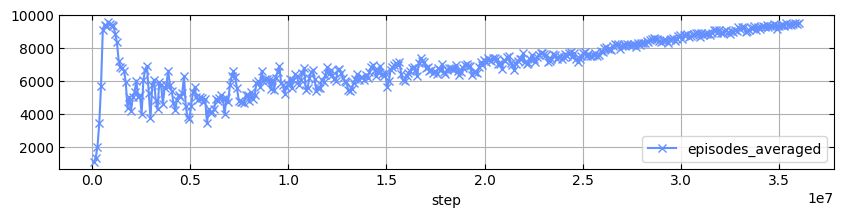

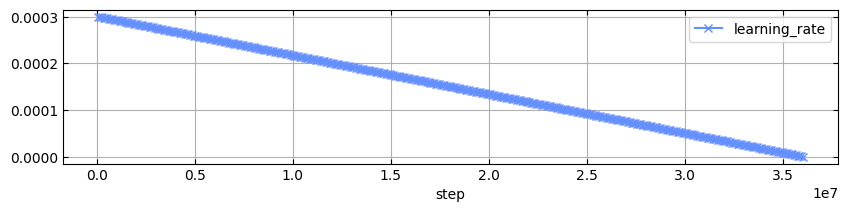

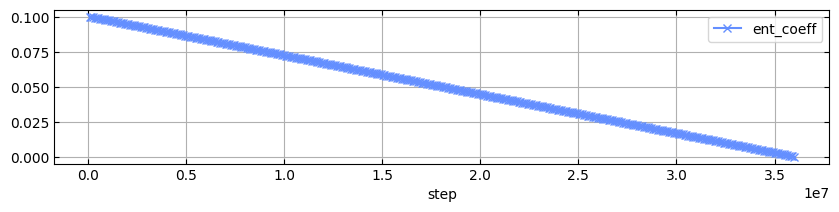

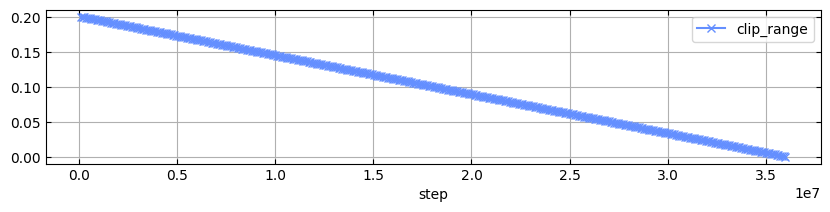

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


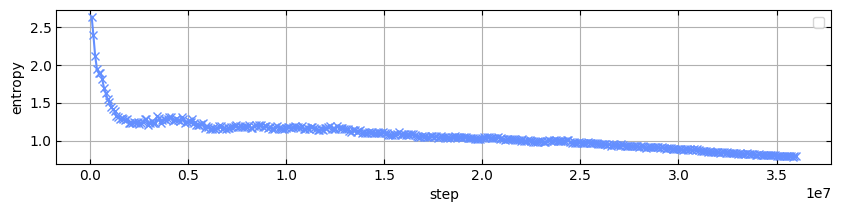

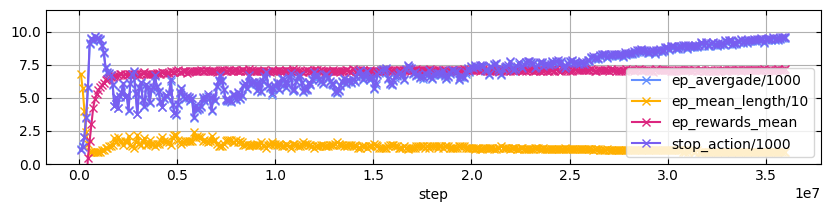

In [8]:
# losses are rescaled by their constant

to_plot = ["losses/entropy_loss", "losses/pol_grad_loss", "losses/value_loss"]
savepath = plot_path / "losses_all.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["losses/entropy_loss", "losses/pol_grad_loss"]
savepath = plot_path / "losses_entropy_pol_grad.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["losses/entropy_loss"]
savepath = plot_path / "losses_entropy.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))



to_plot = ["mean_reward_update", "mean_reward_all"]
savepath = plot_path / "reward.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))


to_plot = ["update_steps"]
savepath = plot_path / "update_step.pdf"
nice_plot(to_plot, step_dict, value_dict, ylims=(0, None), savename=str(savepath))

to_plot = ["kl"]
savepath = plot_path / "kl.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["n_clipped_ratio"] # "now n_clipped_ratio"
savepath = plot_path / "n_clipped.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))


to_plot = ["ep_rewards_max", "ep_rewards_mean", "ep_rewards_min", "ep_rewards_std"] # "now n_clipped_ratio"
savepath = plot_path / "ep_rewards.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["ep_rewards_max", "ep_rewards_mean", "ep_rewards_min", "ep_rewards_std"] # "now n_clipped_ratio"
savepath = plot_path / "ep_rewards_ylim.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath), ylims=(0, None))

to_plot = ["ep_rewards_max",] # "now n_clipped_ratio"
savepath = plot_path / "ep_reward_max.pdf"
nice_plot(to_plot, step_dict, value_dict, ylims=(None, None), savename=str(savepath))

to_plot = ["ep_mean_length"] # "now n_clipped_ratio"
savepath = plot_path / "ep_mean_length.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["episodes_averaged"] # "now n_clipped_ratio"
savepath = plot_path / "episodes_averaged.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["learning_rate"] # "now n_clipped_ratio"
savepath = plot_path / "learning_rate.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["ent_coeff"] # "now n_clipped_ratio"
savepath = plot_path / "ent_coeff.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))

to_plot = ["clip_range"] # "now n_clipped_ratio"
savepath = plot_path / "clip_range.pdf"
nice_plot(to_plot, step_dict, value_dict, savename=str(savepath))


savepath = plot_path / "entropy.pdf"
nice_plot_x_y([step_dict["losses/entropy_loss"]], [-value_dict["losses/entropy_loss"] / value_dict["ent_coeff"]],
              xlabel= "step", ylabel="entropy", savename=str(savepath))

nice_plot_x_y([step_dict["episodes_averaged"], step_dict["episodes_averaged"], step_dict["episodes_averaged"], step_dict["stop_action"]], 
              [value_dict["episodes_averaged"]/1000, 
              value_dict["ep_mean_length"]/10,
              value_dict["ep_rewards_mean"],
              value_dict["stop_action"]/1000],
              label_list=["ep_avergade/1000", "ep_mean_length/10", "ep_rewards_mean", "stop_action/1000"],
              xlabel= "step", ylims=(0, None))


[2.63240304 0.79860529]
[0.1     0.00025]


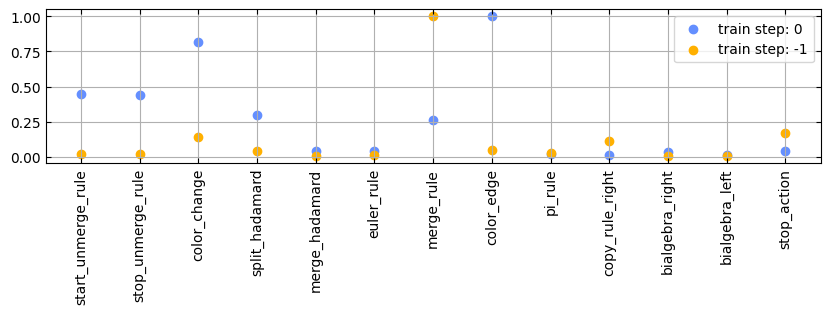

In [9]:
step_idcs = [0, -1]
print((-value_dict["losses/entropy_loss"] / value_dict["ent_coeff"])[step_idcs])
print((value_dict["ent_coeff"])[step_idcs])

plot_action_hist(value_dict, step_idx_list=step_idcs, norm=True)